In [127]:
import numpy as np
import pandas as pd
df = pd.read_csv('dataset.csv')
Avgdata = np.array(df['reviewScore'])
AvgdataMean = Avgdata.mean()
AvgdataSko = np.std(Avgdata)
print(AvgdataMean)
print(AvgdataSko)

76.20133333333334
24.311330655112695


In [129]:
df

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


Text(0.5, 1.0, 'Game price')

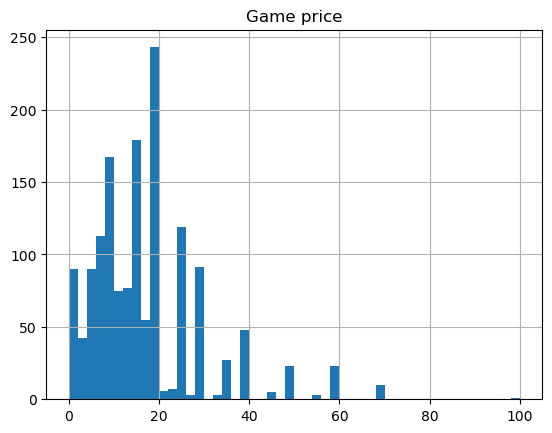

In [89]:
import matplotlib.pyplot as plt 
plt.hist(df['price'], bins=50)
plt.grid(True)
plt.title('Game price')

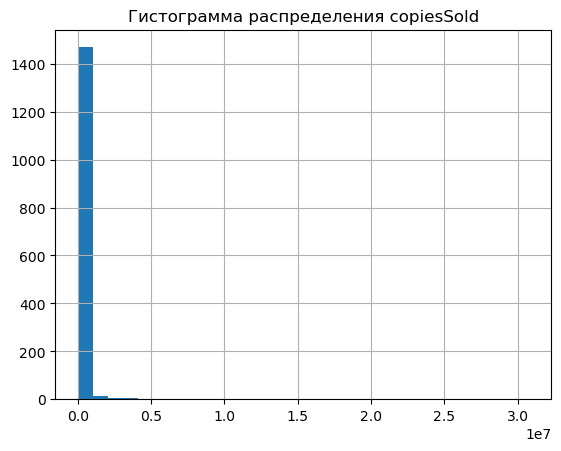

Среднее значение  copiesSold : 141482.57
СКО популярности  copiesSold : 1132379.0120487728
Выбросы:
0        165301
1        159806
2        214192
3        440998
4        141306
         ...   
1495     452146
1496    2640903
1497     501474
1498     156339
1499     544144
Name: copiesSold, Length: 201, dtype: int64
Количество выбросов, обнаруженных по методу IQR:  201
Количество пропущенных значений:  0


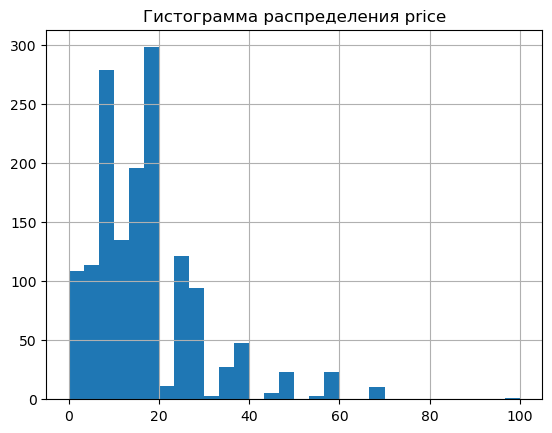

Среднее значение  price : 17.519513333333332
СКО популярности  price : 12.642395346471684
Выбросы:
0       99.99
1       59.99
2       49.99
4       59.99
10      49.99
        ...  
1488    34.99
1490    69.99
1493    39.99
1497    34.99
1498    59.99
Name: price, Length: 140, dtype: float64
Количество выбросов, обнаруженных по методу IQR:  140
Количество пропущенных значений:  0


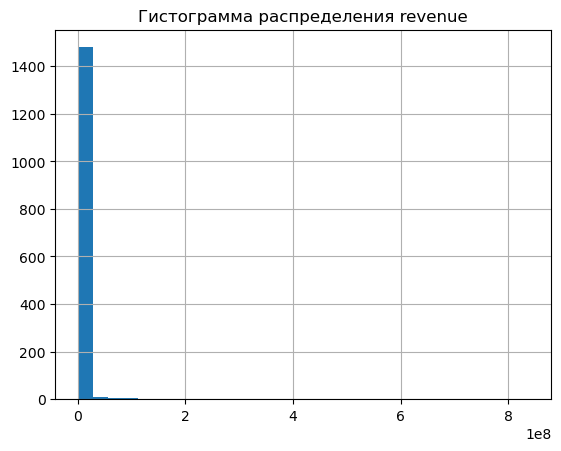

Среднее значение  revenue : 2632381.9826861774
СКО популярности  revenue : 27800967.996853773
Выбросы:
0       8055097.0
1       7882151.0
2       7815247.0
3       7756399.0
4       7629252.0
          ...    
1495    8739530.0
1496    8706135.0
1497    8641459.0
1498    8440898.0
1499    8125042.0
Name: revenue, Length: 223, dtype: float64
Количество выбросов, обнаруженных по методу IQR:  223
Количество пропущенных значений:  0


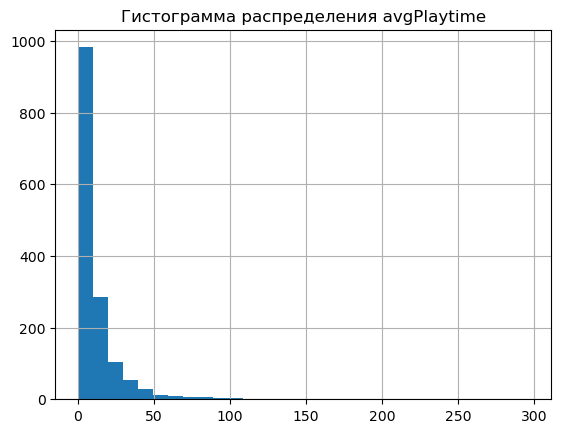

Среднее значение  avgPlaytime : 12.56270363676686
СКО популярности  avgPlaytime : 21.534990641302613
Выбросы:
0       42.365140
1       29.651061
4       34.258496
5       95.697813
7       41.418885
          ...    
1489    33.544343
1493    91.461899
1494    31.078359
1496    31.974027
1499    30.160995
Name: avgPlaytime, Length: 147, dtype: float64
Количество выбросов, обнаруженных по методу IQR:  147
Количество пропущенных значений:  0


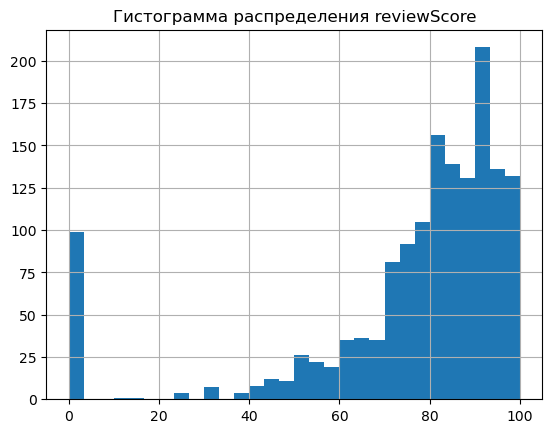

Среднее значение  reviewScore : 76.20133333333334
СКО популярности  reviewScore : 24.311330655112695
Выбросы:
10      0
13      0
16      0
34      0
40      0
       ..
1458    0
1464    0
1478    0
1483    0
1491    0
Name: reviewScore, Length: 118, dtype: int64
Количество выбросов, обнаруженных по методу IQR:  118
Количество пропущенных значений:  0


In [186]:
def detect_outliers_iqr(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        LowerBound = Q1 - 1.5 * IQR
        UpperBound = Q3 + 1.5 * IQR
        
        IQR_Outliers = (df[column] < LowerBound) | (df[column] > UpperBound)
        
        outlier_values = df[IQR_Outliers][column]

        if not outlier_values.empty:
            print("Выбросы:")
            print(outlier_values)  # Выводим все выбросы
        else:
            print("Выбросов не обнаружено.")
        
        # Подсчитываем количество выбросов
        number_of_outliers = outlier_values.shape[0]
        print("Количество выбросов, обнаруженных по методу IQR: ", number_of_outliers)
colon = ['copiesSold', 'price', 'revenue', 'avgPlaytime',  'reviewScore']
for i in colon:
    Avgdata = np.array(df[i])
    AvgdataMean = Avgdata.mean()
    AvgdataSko = np.std(Avgdata)
    
    plt.hist(df[i], bins=30)
    plt.grid(True)
    title = "Гистограмма распределения " + i
    plt.title(title)
    plt.show()
    
    print("Среднее значение ",i, ":", AvgdataMean)
    print("СКО популярности ",i, ":", AvgdataSko)
    detect_outliers_iqr(df, i)
    print("Количество пропущенных значений: ",df[i].isnull().sum())


            copiesSold     price
copiesSold    1.000000  0.056224
price         0.056224  1.000000


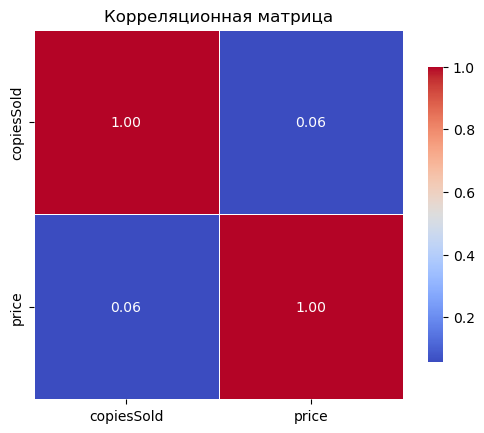

          revenue     price
revenue  1.000000  0.162521
price    0.162521  1.000000


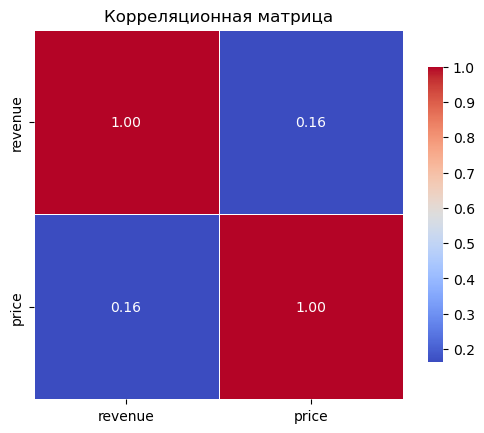

             avgPlaytime     price
avgPlaytime     1.000000  0.029053
price           0.029053  1.000000


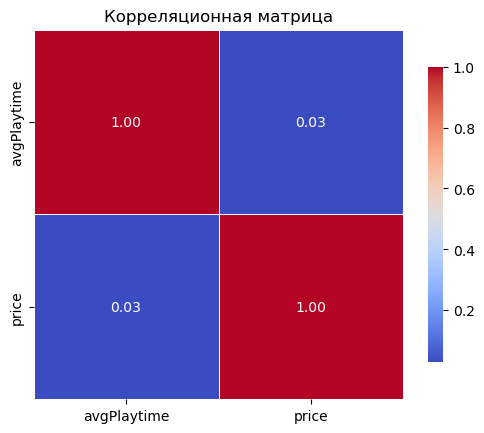

             reviewScore     price
reviewScore     1.000000 -0.035025
price          -0.035025  1.000000


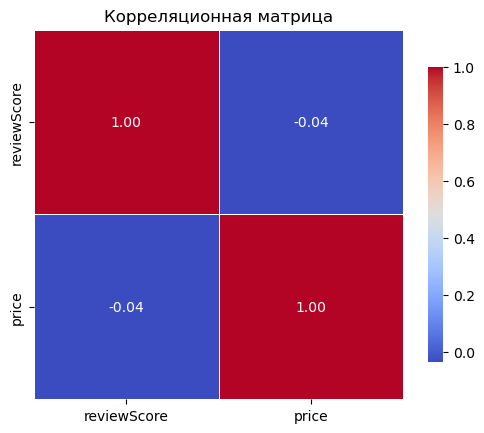

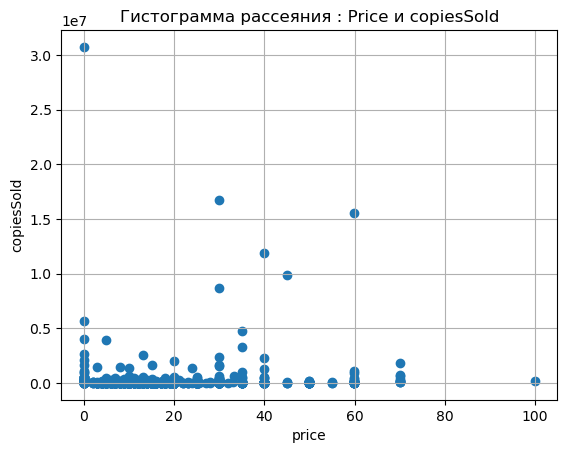

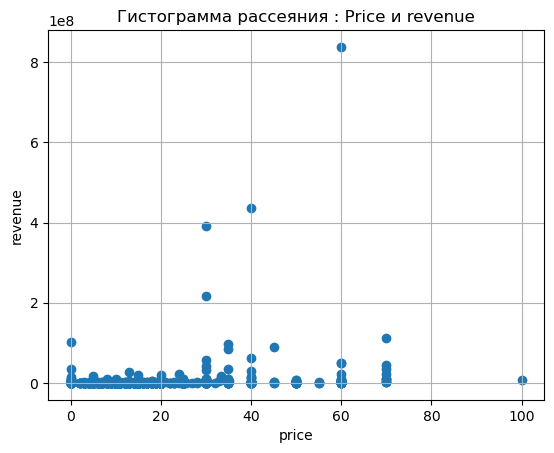

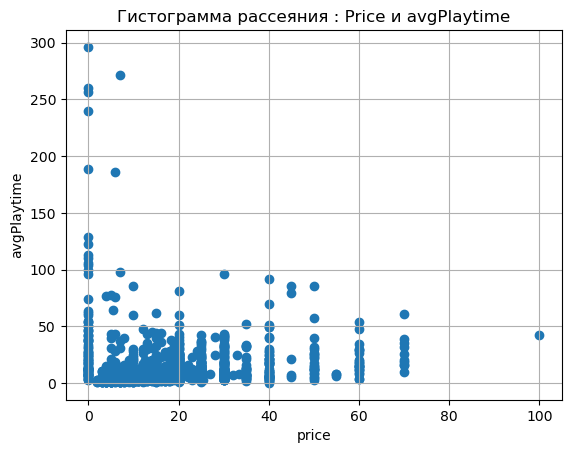

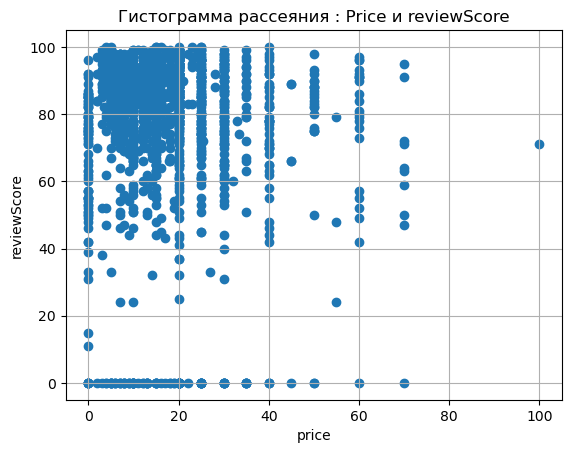

In [212]:
colon = ['copiesSold', 'revenue', 'avgPlaytime',  'reviewScore']
for i in colon:
    correlation = df[i].corr(df['price'])
    subset = df[[i, 'price']]
    correlation_matrix = subset.corr()
    print(correlation_matrix)

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .8})
    plt.title('Корреляционная матрица')
    plt.show()

colon = ['copiesSold', 'revenue', 'avgPlaytime',  'reviewScore']
for i in colon:
    plt.scatter(df['price'],df[i]);
    plt.xlabel('price')
    plt.ylabel(i)
    plt.grid(True)
    title = "Гистограмма рассеяния : Price и " + i
    plt.title(title)
    plt.show()